<a href="https://colab.research.google.com/github/shitodcy/Convolutional-Neural-Network-CNN-motif-batik/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import os
import zipfile
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization

In [90]:
!wget --no-check-certificate \
  "https://github.com/annaamikom/dataset-batik/archive/refs/heads/main.zip" \
  -O /tmp/batik_dataset.zip

# Ekstrak file
local_zip = '/tmp/batik_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/dataset-batik-main/dataset-batik'
print("Isi direktori utama:", os.listdir(base_dir))

class_names = sorted(os.listdir(os.path.join(base_dir, 'training')))
print("Kelas motif batik:", class_names)


--2025-07-21 05:11:11--  https://github.com/annaamikom/dataset-batik/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/annaamikom/dataset-batik/zip/refs/heads/main [following]
--2025-07-21 05:11:11--  https://codeload.github.com/annaamikom/dataset-batik/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/batik_dataset.zip’

/tmp/batik_dataset.     [     <=>            ] 262.44M  29.6MB/s    in 9.5s    

2025-07-21 05:11:21 (27.5 MB/s) - ‘/tmp/batik_dataset.zip’ saved [275191364]

Isi direktori utama: ['training', 'testing']
Kelas motif batik: ['batik-bali', 'batik-betawi', 'batik

In [91]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 10

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'training'),
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'training'),
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 633 images belonging to 20 classes.
Found 154 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


In [92]:
model = Sequential([
    # Input Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(), # <- Tambahkan ini
    MaxPooling2D(2, 2),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(), # <- Tambahkan ini
    MaxPooling2D(2, 2),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(), # <- Tambahkan ini
    MaxPooling2D(2, 2),

    # ... tambahkan BatchNormalization setelah setiap lapisan Conv2D lainnya ...

    # Flatten & Output
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax') # Gunakan len(class_names)
])

mixed_precision.set_global_policy('mixed_float16')
model.compile(
    optimizer=Adam(learning_rate=0.0001), # Coba nilai yang lebih kecil dari 0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,044,820 (72.65 MB)

 Trainable params: 19,044,372 (72.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [93]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)

Epoch 1/50
63/63 - 25s - 398ms/step - accuracy: 0.1043 - loss: 7.2988 - val_accuracy: 0.0467 - val_loss: 4.7782
Epoch 2/50
63/63 - 4s - 64ms/step - accuracy: 0.2000 - loss: 7.2281 - val_accuracy: 0.0533 - val_loss: 4.7318
Epoch 3/50
63/63 - 12s - 194ms/step - accuracy: 0.1445 - loss: 4.3168 - val_accuracy: 0.0467 - val_loss: 8.1565
Epoch 4/50
63/63 - 2s - 40ms/step - accuracy: 0.2000 - loss: 3.1689 - val_accuracy: 0.0667 - val_loss: 8.0366
Epoch 5/50
63/63 - 20s - 325ms/step - accuracy: 0.1685 - loss: 2.9065 - val_accuracy: 0.0333 - val_loss: 7.7211
Epoch 6/50
63/63 - 3s - 40ms/step - accuracy: 0.3000 - loss: 2.7815 - val_accuracy: 0.0400 - val_loss: 7.8089
Epoch 7/50
63/63 - 20s - 325ms/step - accuracy: 0.2648 - loss: 2.5432 - val_accuracy: 0.0533 - val_loss: 8.6066
Epoch 8/50
63/63 - 3s - 41ms/step - accuracy: 0.1000 - loss: 3.0830 - val_accuracy: 0.0400 - val_loss: 8.6777
Epoch 9/50
63/63 - 31s - 485ms/step - accuracy: 0.2873 - loss: 2.4029 - val_accuracy: 0.0667 - val_loss: 6.1062


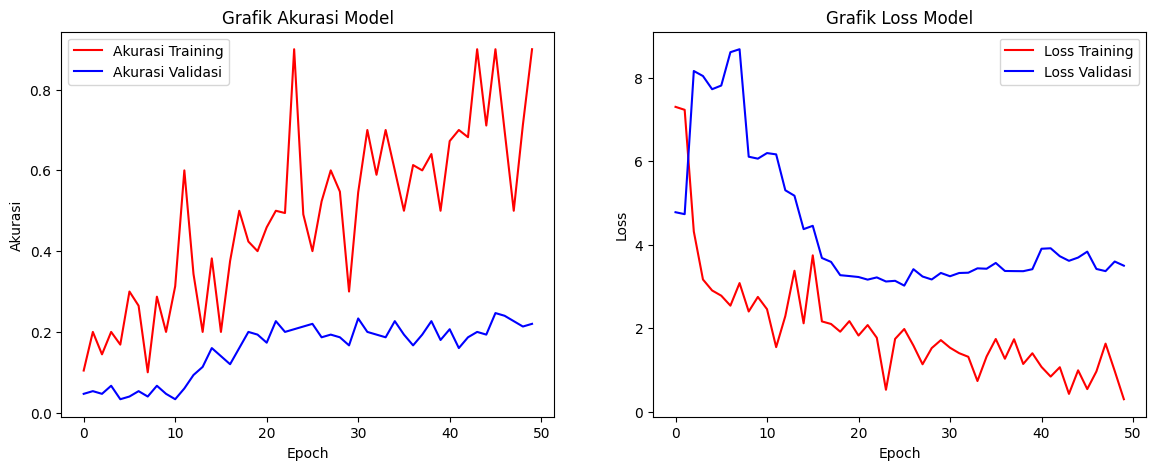

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Grafik Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Grafik Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc=0)

plt.show()

In [95]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nAkurasi pada Test Set: {test_accuracy*100:.2f}%")
print(f"Loss pada Test Set: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.2238 - loss: 3.7963

Akurasi pada Test Set: 20.10%
Loss pada Test Set: 3.9458


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


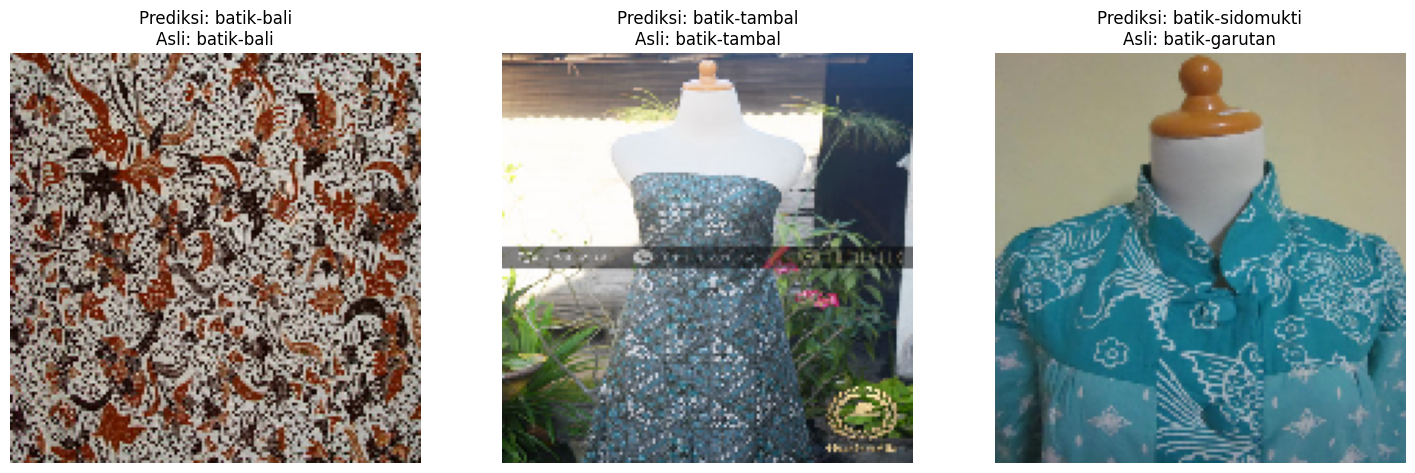

In [97]:
# Direktori data pengujian
test_dir = os.path.join(base_dir, 'testing')

# Dapatkan daftar nama kelas (folder) di direktori tes
list_kelas_batik = [f for f in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, f))]

# Ambil 3 kelas batik secara acak
kelas_terpilih = random.sample(list_kelas_batik, 3)

# Ambil satu gambar acak dari masing-masing 3 kelas yang terpilih
gambar_untuk_prediksi = []
for kelas in kelas_terpilih:
    folder_kelas = os.path.join(test_dir, kelas)
    gambar_acak = random.choice(os.listdir(folder_kelas))
    gambar_untuk_prediksi.append(os.path.join(folder_kelas, gambar_acak))

# --- Proses Prediksi dan Visualisasi ---
plt.figure(figsize=(18, 6))
for i, img_path in enumerate(gambar_untuk_prediksi):
    # Memuat dan memproses gambar
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array_normalized = np.expand_dims(img_array, axis=0) / 255.0

    # Melakukan prediksi
    prediction = model.predict(img_array_normalized)

    # Mendapatkan nama kelas dari hasil prediksi
    # Pastikan 'class_names' sesuai dengan urutan kelas pada generator Anda
    class_names = list(train_generator.class_indices.keys())
    predicted_class_name = class_names[np.argmax(prediction)]

    # Mendapatkan nama kelas asli dari path folder
    actual_class_name = os.path.basename(os.path.dirname(img_path))

    # Menampilkan gambar dan hasil prediksi
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class_name}\nAsli: {actual_class_name}", fontsize=12)
    plt.axis('off')

plt.show()